# Work on SPY daily data to see some simply statistical feature of return

Most of the tests done below are from the two links

https://pythondata.com/stationary-data-tests-for-time-series-forecasting/

https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Define a func to return head and tail of a df
def ends(df,x=1):
    dfends=df.head(x).append(df.tail(x))
    return dfends

In [3]:
# Read the cleaned data and sort by symbol and by data, to make sure the date is in right order for any analysis

stock_with_pct=pd.read_csv(os.path.join('C:/Users/FN.LN/Documents/Market', 'SP500_FIVE_YR_Cleaned_Sorted_Ret.csv'),sep=',')
ends(stock_with_pct)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Row Count,t0_pct,...,t1_pct,t2_pct,t3_pct,t4_pct,t5_pct,t1_cumu_pct,t2_cumu_pct,t3_cumu_pct,t4_cumu_pct,t5_cumu_pct
0,2015-01-12,40.610001,40.720001,39.950001,40.110001,38.303940,2770800.0,A,1246,-0.011825,...,-0.013962,-0.012389,-0.026881,0.006314,-0.008366,-0.013962,-0.026178,-0.052356,-0.046373,-0.054351
603914,2019-12-05,119.199997,120.260002,118.000000,120.110001,120.110001,2771100.0,ZTS,1246,0.003090,...,0.013404,-0.004026,0.012786,0.006353,0.000324,0.013404,0.009325,0.022230,0.028724,0.029057


In [4]:
spy=stock_with_pct.loc[stock_with_pct['Symbol'] == 'SPY',].reset_index(drop=True)

In [5]:
ends(spy)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Row Count,t0_pct,...,t1_pct,t2_pct,t3_pct,t4_pct,t5_pct,t1_cumu_pct,t2_cumu_pct,t3_cumu_pct,t4_cumu_pct,t5_cumu_pct
0,2015-01-12,204.410004,204.600006,201.919998,202.649994,184.542984,144396100.0,SPY,1246,-0.007834,...,-0.002813,-0.006037,-0.009160,0.013114,0.002133,-0.002813,-0.008833,-0.017912,-0.005033,-0.002911
1234,2019-12-05,312.230011,312.250000,310.579987,312.019989,312.019989,40709000.0,SPY,1246,0.001798,...,0.009134,-0.003144,-0.001115,0.002839,0.005216,0.009134,0.005961,0.004839,0.007692,0.012948


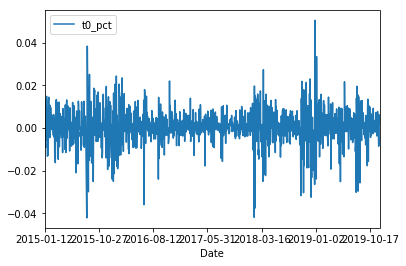

In [6]:
spy.plot(x='Date',y='t0_pct')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1A918DEB8>]],
      dtype=object)

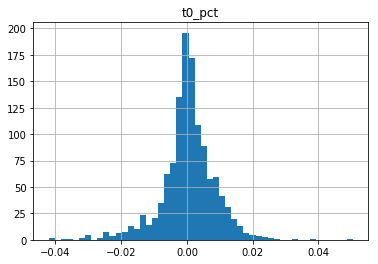

In [7]:
spy.hist(column='t0_pct',bins=50)

Now, let’s look at some statistical tests. A simple one that you can use is to look at the mean and variance of multiple sections of the data and compare them. If they are similar, your data is most likely stationary.
There are many different ways to split the data for this check, but one way I like to do this is to follow the approach highlighted here: 

https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213

In [8]:
one, two, three = np.split(
        spy['t0_pct'].sample(
        frac=1), [int(.25*len(spy['t0_pct'])),
        int(.75*len(spy['t0_pct']))])

The above code creates three new series. I randomly selected 25% for series one and 75% for the two and three – but you could create them of equal length if you wanted. I like making them different sizes just for a bit of extra randomness to the test.

Next, we’ll look at the means and variances of each series to see what they look like. Remember, if the data is stationary, the means/variances should be similar.

In [9]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()
 
print (mean1, mean2, mean3)
print (var1, var2, var3)

0.000790998328987481 -0.0001428456428847395 0.0013155087663279546
6.2329930285163e-05 7.469593195117852e-05 7.435758558987376e-05


The output of means and vars look close enough to be stationary data

Now that you know how to find stationarity using some plots and some basic stats, you should know that the above tests can be fooled sometimes, especially since they make assumptions about your data. So…don’t rely on these only…they’re a quick way to see what you have without having to pull out the big guns and run things like the Dickey-Fuller test.

# Dickey-Fuller Test for Stationarity
Officially, this is called the ‘augmented Dickey-Fuller test’, but most folks just say ‘Dickey-Fuller’ when talking about it.  This is a test that tests the null hypothesis that a unit root is present in time series data.    To make things a bit more clear, this test is checking for stationarity or non-stationary data.  The test is trying to reject the null hypothesis that a unit root exists and the data is non-stationary. If the null hypothesis is rejected, then the alternate can be considered valid (e.g., the data is stationary).  You can read more about the test here if interested.

When you run the test, you’ll get an ADF value and a p-value. The ADF number should be a negative number and the p-value should be beneath a certain threshold value (e.g., 1% or 5%, etc) for a confidence level. For this example, we’ll use 5% (or 95% confidence level), so if the p-value is greater than 0.05 then we say we fail to reject the null hypothesis because the data has a unit root and is non-stationary.  If the p-value is less than or equal to 0.05, we can say we reject the null hypothesis because the data does not have a unit root and is stationary.

Let’s run the Augmented Dickey-Fuller test and see what we see.  The statsmodels library has a function called adfuller to make it easy for us to run this test.

In [ ]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(spy['t0_pct'])
 
print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

ADF = -26.41392880761128

p-value = 0.0

Our p-value is definitely less than 0.5 and is even less than 0.01 so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary. 

# Check if a data set or time series is random by Lag Plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random

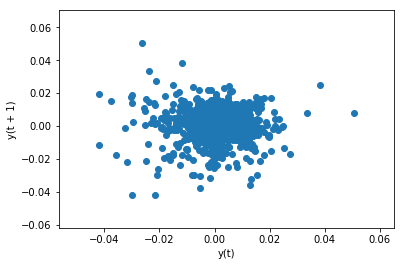

In [11]:
pd.plotting.lag_plot(spy['t0_pct'], lag=1)

# Checking randomness in time series using auto-correlation plot of Pandas
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

In [12]:
from pandas.plotting import autocorrelation_plot

(-0.1, 0.1)

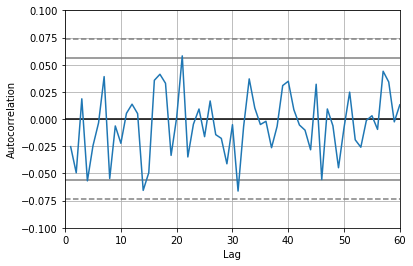

In [13]:
autocorrelation_plot(spy['t0_pct'])
plt.xlim(0,60)
plt.ylim(-0.1,0.1)

# Correlation and Autocorrelation by Statsmodels Library
Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson correlation coefficient to summarize the correlation between the variables.

The Pearson correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

(-0.1, 0.1)

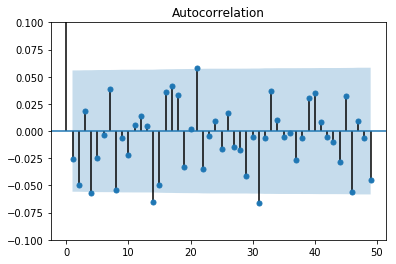

In [15]:
plot_acf(spy['t0_pct'], lags = range(0,50))
plt.ylim(-0.1,0.1)

Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

By default, all lag values are printed, which makes the plot noisy.

We can limit the number of lags on the x-axis to 50, 20, 5 respectively to make the plots easier to read.

# Partial Autocorrelation Function
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

The example below calculates and plots a partial autocorrelation function for the first 50 lags in the Minimum Daily Temperatures dataset using the plot_pacf() from the statsmodels library.

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

(-0.1, 0.1)

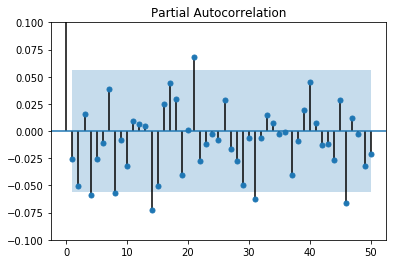

In [17]:
plot_pacf(spy['t0_pct'], lags = 50)
plt.ylim(-0.1,0.1)